In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

In [3]:
data_dir = '/content/drive/MyDrive/result'

img_height,img_width=180,180
batch_size=2
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3919 files belonging to 4 classes.
Using 3136 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3919 files belonging to 4 classes.
Using 783 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4']


In [15]:
resnet_model = tf.keras.models.Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [16]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
1568/1568 [==============================] - 459s 283ms/step - loss: 0.8566 - accuracy: 0.6601 - val_loss: 0.6794 - val_accuracy: 0.7037
Epoch 2/25
1568/1568 [==============================] - 61s 39ms/step - loss: 0.4652 - accuracy: 0.8125 - val_loss: 0.4152 - val_accuracy: 0.8250
Epoch 3/25
1568/1568 [==============================] - 62s 39ms/step - loss: 0.2881 - accuracy: 0.8846 - val_loss: 0.4443 - val_accuracy: 0.8250
Epoch 4/25
1568/1568 [==============================] - 61s 39ms/step - loss: 0.2297 - accuracy: 0.9174 - val_loss: 0.6282 - val_accuracy: 0.7918
Epoch 5/25
1568/1568 [==============================] - 61s 39ms/step - loss: 0.1718 - accuracy: 0.9343 - val_loss: 0.5338 - val_accuracy: 0.8352
Epoch 6/25
1568/1568 [==============================] - 61s 39ms/step - loss: 0.1455 - accuracy: 0.9432 - val_loss: 0.5532 - val_accuracy: 0.8263
Epoch 7/25
1568/1568 [==============================] - 61s 39ms/step - loss: 0.1061 - accuracy: 0.9614 - val_loss: 0.6039

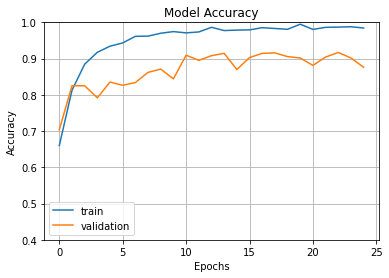

In [21]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

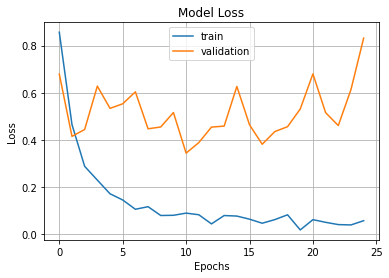

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [23]:
pip install tensorflowjs

     |████████████████████████████████| 77 kB 3.1 MB/s 
     |████████████████████████████████| 462 kB 35.1 MB/s 


In [25]:
import tensorflowjs as tfjs

tfjs_target_dir = '/content/drive/MyDrive'
tfjs.converters.save_keras_model(resnet_model, tfjs_target_dir)